In [1]:
# Workaround for training output not visible in JupyterNotebook https://github.com/microsoft/vscode-jupyter/issues/13163
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [2]:
from fastai.vision.all import *
import timm

In [16]:
path = untar_data(URLs.PETS)/'images'
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42,
                                      label_func=RegexLabeller(pat=r'^([^/]+)_\d+'),
                                      item_tfms=Resize(224)
                                      )

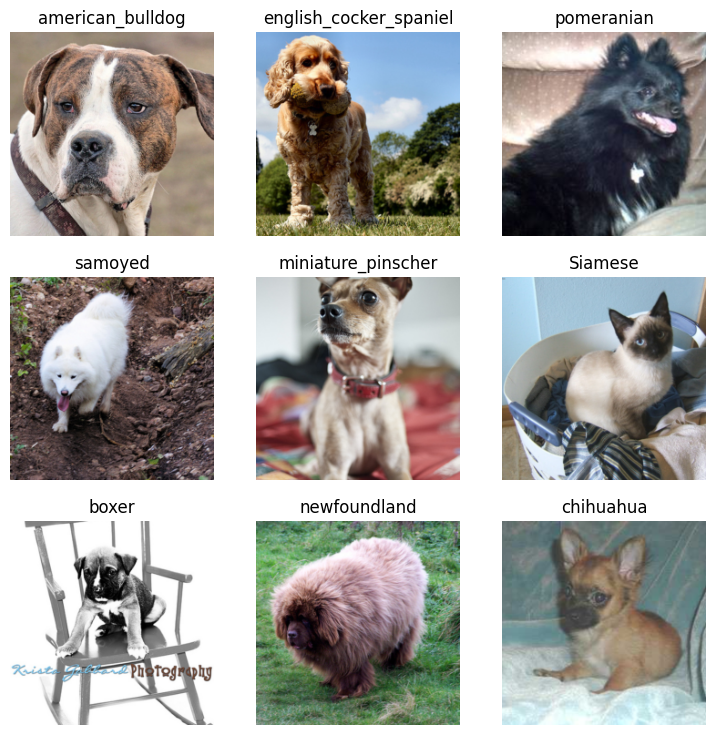

In [17]:
dls.show_batch(max_n=9)

In [18]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.447307,0.355877,0.104871,00:16
1,0.297329,0.225975,0.079161,00:16
2,0.148030,0.187313,0.066306,00:16


In [20]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [21]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.278300,0.207591,0.064953,00:18
1,0.206970,0.159320,0.050744,00:18
2,0.122374,0.133258,0.047361,00:18


In [24]:
learn.export('model.pkl')

In [25]:
learn_inf = load_learner(path/'model.pkl')

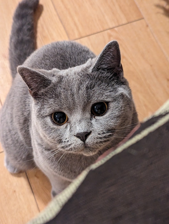

In [26]:
im = PILImage.create('./chi_cat.jpg')
im.thumbnail((224,224))
im

In [27]:
learn_inf.predict(im)

('British_Shorthair',
 tensor(4),
 tensor([1.0344e-03, 6.6278e-06, 2.0495e-06, 2.6610e-04, 5.8632e-01, 1.4710e-04,
         8.0520e-05, 5.3385e-05, 5.5854e-05, 4.1132e-01, 6.1502e-06, 2.7888e-04,
         2.0393e-06, 1.0418e-05, 1.6293e-04, 3.2030e-05, 7.4580e-06, 2.5958e-05,
         8.8108e-06, 4.6813e-06, 1.2317e-05, 1.0677e-05, 1.5114e-05, 1.2408e-05,
         5.9742e-06, 9.1506e-07, 4.6323e-06, 2.1873e-05, 2.6246e-06, 4.2792e-06,
         1.4672e-05, 6.1111e-06, 3.9570e-06, 3.5619e-05, 1.1120e-05, 4.5787e-06,
         1.0456e-05]))

In [29]:
categories = learn_inf.dls.vocab
def classify_image(img):
    pred,idx,probs = learn_inf.predict(img)
    return dict(zip(categories, map(float,probs)))



In [30]:
classify_image(im)

{'Abyssinian': 0.0010344336042180657,
 'Bengal': 6.627813036175212e-06,
 'Birman': 2.0495363060035743e-06,
 'Bombay': 0.0002661017933860421,
 'British_Shorthair': 0.5863185524940491,
 'Egyptian_Mau': 0.0001470995048293844,
 'Maine_Coon': 8.052013436099514e-05,
 'Persian': 5.3385414503281936e-05,
 'Ragdoll': 5.5853819503681734e-05,
 'Russian_Blue': 0.4113186299800873,
 'Siamese': 6.150166427687509e-06,
 'Sphynx': 0.0002788811980281025,
 'american_bulldog': 2.0393042632349534e-06,
 'american_pit_bull_terrier': 1.0418365491204895e-05,
 'basset_hound': 0.00016292558575514704,
 'beagle': 3.2030009606387466e-05,
 'boxer': 7.45803527024691e-06,
 'chihuahua': 2.5957600882975385e-05,
 'english_cocker_spaniel': 8.810799045022577e-06,
 'english_setter': 4.681281552620931e-06,
 'german_shorthaired': 1.2316666470724158e-05,
 'great_pyrenees': 1.0676665624487214e-05,
 'havanese': 1.5113883819140028e-05,
 'japanese_chin': 1.2407715985318646e-05,
 'keeshond': 5.974246050755028e-06,
 'leonberger': 9.15

In [31]:
my_model = learn_inf.model
my_model

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (drop_path): Identity()
            )
            (1): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 

In [32]:
layer = my_model.get_submodule('0.model.stem.1')
list(layer.parameters())

[Parameter containing:
 tensor([ 1.2539e+00,  1.9190e+00,  1.2190e+00,  1.0393e+00, -2.2991e-03,
          7.6673e-01,  8.8730e-01,  1.6310e+00,  7.0553e-01,  3.2891e+00,
          7.8651e-01, -1.4597e-03,  9.9893e-01, -8.9198e-04,  3.2975e+00,
          1.1524e-04,  1.9838e+00,  1.0226e+00,  4.4529e+00,  2.5723e-01,
          2.7249e+00,  9.2607e-01,  1.2375e+00,  4.9802e-03,  1.7873e+00,
          5.4326e-01,  4.6257e+00,  1.0856e-02, -6.2545e-04,  3.4513e+00,
          1.3536e+00,  4.1260e+00,  2.6885e+00,  4.1199e+00,  3.4010e+00,
          8.4905e-01,  7.3637e-01,  3.9796e+00,  1.2862e+00,  6.4053e-01,
          2.6890e+00,  1.1181e+00,  1.1708e+00,  5.5377e-01,  2.3345e+00,
          6.8782e-04,  9.6804e-01,  2.7815e-03,  1.1987e+00,  1.7892e+00,
          4.0146e-01,  4.5017e-01,  9.7163e-01,  3.9886e+00,  6.5901e-01,
          6.8711e-01,  9.8514e-01,  2.7057e+00,  1.2171e+00,  7.6158e-01,
          3.3017e+00,  1.6199e+00,  9.5533e-01,  2.1206e+00,  6.2898e-01,
          4.033

In [33]:
layer = my_model.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(layer.parameters())

[Parameter containing:
 tensor([[ 0.0227, -0.0016,  0.0404,  ...,  0.0018, -0.0451,  0.0081],
         [-0.1439,  0.0167,  0.0259,  ...,  0.0126, -0.1044,  0.0563],
         [-0.0654, -0.0328,  0.0057,  ..., -0.0417,  0.0658, -0.0402],
         ...,
         [-0.0087,  0.0699,  0.0002,  ...,  0.0042,  0.0414, -0.0191],
         [ 0.0020,  0.0321,  0.0297,  ..., -0.0298, -0.0304,  0.0554],
         [ 0.1211, -0.0354, -0.0044,  ..., -0.0062,  0.0237, -0.0114]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.4047, -0.7418, -0.4234, -0.1651, -0.3027, -0.1899, -0.5533, -0.6270,
         -0.3007, -0.4253, -0.5995, -0.4106, -0.2173, -1.7935, -0.3170, -0.1164,
         -0.4482, -0.2847, -0.4343, -0.4945, -0.4065, -1.1402, -0.6754, -1.7237,
         -0.2954, -0.2655, -0.2187, -0.3914, -0.4148, -0.4772,  0.2365, -0.7542,
         -0.5851, -0.1820, -1.5271, -0.3624, -2.4690, -2.3461, -0.6108, -0.4114,
         -0.6964, -0.5764, -0.5877, -0.0321, -2.0355, -0.2859, -0.3954, -0.8403